### In this notebook, we will be analyzing visitors data collected on an ecommerce site

In [1]:
# import libraries 
library(tidyverse)
library(lubridate)
library(scales)

# import dataset
df <- read.csv('health-ecommerce-website.csv')
df %>% head()

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.3     v dplyr   1.0.0
v tidyr   1.1.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.3"Warning message:
"package 'forcats' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning mess

dateTime,country,profile,age,gender,referral,pageviews,purchased,purchaseAmount
2014-08-29 03:34,Australia,Friend/family friend,25-34,Female,Unbranded Search,9,0,0
2014-09-10 09:03,United States,Friend/family friend,25-34,Female,Unbranded Search,7,0,0
2014-08-13 22:43,United States,Friend/family friend,35-44,Female,Social,3,0,0
2014-09-05 12:37,United States,Friend/family friend,35-44,Female,Unbranded Search,7,0,0
2014-08-20 18:29,United States,Friend/family friend,45-54,Female,Unbranded Search,11,0,0
2014-08-04 02:17,United States,Friend/family friend,55-64,Female,Unbranded Search,11,0,0


In [2]:
# check data type
sapply(df,typeof)
sapply(df,class)

dateTime        country        profile            age         gender 
     "integer"      "integer"      "integer"      "integer"      "integer" 
      referral      pageviews      purchased purchaseAmount 
     "integer"      "integer"      "integer"       "double"

dateTime        country        profile            age         gender 
      "factor"       "factor"       "factor"       "factor"       "factor" 
      referral      pageviews      purchased purchaseAmount 
      "factor"      "integer"      "integer"      "numeric"

In [3]:
# change col data types
# change dateTime to datetime data type
# change country, profile, age, gender, referral to character data type
# df$country <- as.character(as.numeric(df$country))
read_csv("health-ecommerce-website.csv",
         col_types = cols(dateTime = col_datetime()))%>%as_tibble->df

In [4]:
df %>% head

dateTime,country,profile,age,gender,referral,pageviews,purchased,purchaseAmount
2014-08-29 03:34:00,Australia,Friend/family friend,25-34,Female,Unbranded Search,9,0,0
2014-09-10 09:03:00,United States,Friend/family friend,25-34,Female,Unbranded Search,7,0,0
2014-08-13 22:43:00,United States,Friend/family friend,35-44,Female,Social,3,0,0
2014-09-05 12:37:00,United States,Friend/family friend,35-44,Female,Unbranded Search,7,0,0
2014-08-20 18:29:00,United States,Friend/family friend,45-54,Female,Unbranded Search,11,0,0
2014-08-04 02:17:00,United States,Friend/family friend,55-64,Female,Unbranded Search,11,0,0


In [5]:
# check datatype
sapply(df,class)

$dateTime
[1] "POSIXct" "POSIXt" 

$country
[1] "character"

$profile
[1] "character"

$age
[1] "character"

$gender
[1] "character"

$referral
[1] "character"

$pageviews
[1] "numeric"

$purchased
[1] "numeric"

$purchaseAmount
[1] "numeric"

In [6]:
df%>% glimpse

Rows: 1,592
Columns: 9
$ dateTime       <dttm> 2014-08-29 03:34:00, 2014-09-10 09:03:00, 2014-08-1...
$ country        <chr> "Australia", "United States", "United States", "Unit...
$ profile        <chr> "Friend/family friend", "Friend/family friend", "Fri...
$ age            <chr> "25-34", "25-34", "35-44", "35-44", "45-54", "55-64"...
$ gender         <chr> "Female", "Female", "Female", "Female", "Female", "F...
$ referral       <chr> "Unbranded Search", "Unbranded Search", "Social", "U...
$ pageviews      <dbl> 9, 7, 3, 7, 11, 11, 12, 5, 3, 2, 5, 2, 2, 12, 12, 3,...
$ purchased      <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ purchaseAmount <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...


In [7]:
df %>% summary

    dateTime                     country            profile         
 Min.   :2014-07-25 14:10:00   Length:1592        Length:1592       
 1st Qu.:2014-08-06 23:23:00   Class :character   Class :character  
 Median :2014-08-20 14:36:00   Mode  :character   Mode  :character  
 Mean   :2014-08-20 03:50:21                                        
 3rd Qu.:2014-09-02 11:18:45                                        
 Max.   :2014-09-11 11:53:00                                        
     age               gender            referral           pageviews     
 Length:1592        Length:1592        Length:1592        Min.   : 1.000  
 Class :character   Class :character   Class :character   1st Qu.: 3.000  
 Mode  :character   Mode  :character   Mode  :character   Median : 6.000  
                                                          Mean   : 6.765  
                                                          3rd Qu.:10.000  
                                                          Max.   :1

In [8]:
# find total no. of page views
df %>%
summarize(sum(pageviews))

sum(pageviews)
10770


In [9]:
# find out which profile visit the site the most, arrange in desc
df %>%
count(profile)%>%
arrange(-n)

profile,n
Parent,776
Health Professional,277
Teacher,223
Other,134
Relative,107
Patient,52
Friend/family friend,23


In [10]:
# find out which age group of parents visit the site the most

df%>%
filter(profile=="Parent")%>%
group_by(age)%>%
count(age,referral)%>%
arrange(-n)

age,referral,n
35-44,Unbranded Search,106
25-34,Unbranded Search,92
35-44,Direct,74
45-54,Unbranded Search,69
18-24,Unbranded Search,53
55-64,Unbranded Search,53
45-54,Direct,46
25-34,Direct,44
35-44,Referred,28
18-24,Direct,27


In [11]:
# Did our top 10 visitors purchased at the site?

df %>%
count(profile, age, purchased)%>%
arrange(-n)%>%
head(10)

profile,age,purchased,n
Parent,35-44,0,215
Parent,25-34,0,162
Parent,45-54,0,127
Parent,18-24,0,97
Parent,55-64,0,94
Health Professional,25-34,0,58
Health Professional,35-44,0,58
Health Professional,45-54,0,58
Teacher,45-54,0,58
Health Professional,55-64,0,55


In [12]:
# How many purchases are there in total?
df %>%
count(purchased)

purchased,n
0,1479
1,113


In [13]:
# How many female/male visitors bought something?
df %>%
filter(purchased==1)%>%
count(gender)%>%
arrange(-n)

gender,n
Female,59
NA,50
Male,4


In [14]:
# which referral channel has the highest revenue?
df %>%
group_by(referral)%>%
summarize(purchases=sum(purchased),
         revenue=sum(purchaseAmount))%>%
arrange(-revenue)

`summarise()` ungrouping output (override with `.groups` argument)


referral,purchases,revenue
Unbranded Search,50,5196.21
Direct,35,3517.91
Branded Search,11,1097.92
Referred,8,823.58
Self Referred,6,542.52
Social,3,327.18
Email,0,0.00
Paid Search,0,0.00


`summarise()` ungrouping output (override with `.groups` argument)


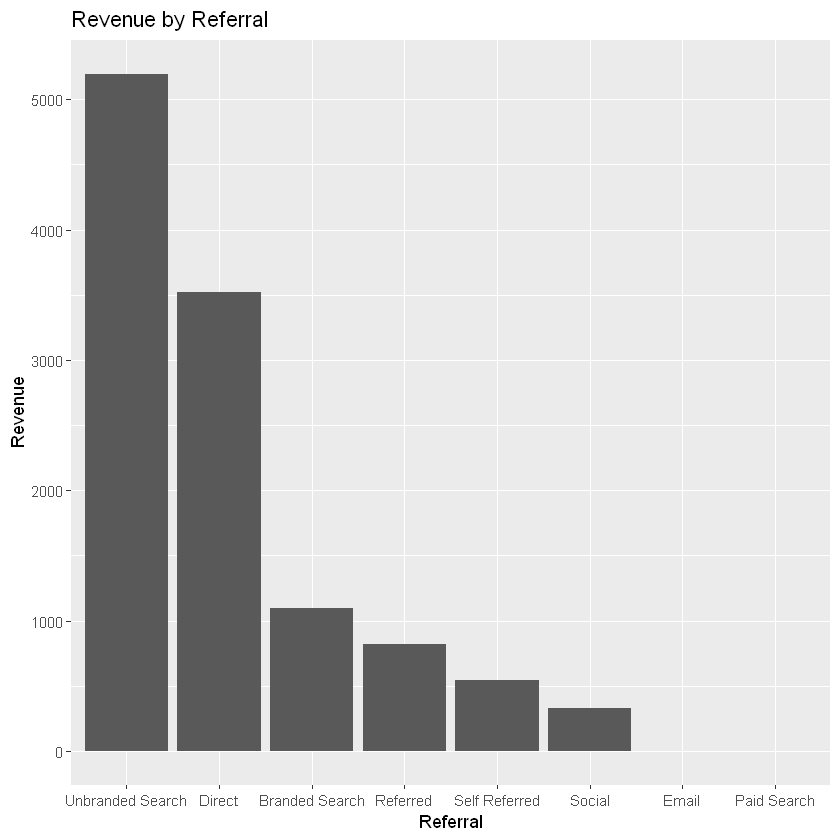

In [15]:
# graph visualization

df %>%
group_by(referral)%>%
summarize(revenue=sum(purchaseAmount))%>%
ggplot(aes(x=reorder(referral,-revenue),y=revenue))+
geom_col()+
ggtitle('Revenue by Referral')+
xlab('Referral') + ylab('Revenue')

In [16]:
# which top 10 country has the highest revenue?
df %>%
group_by(country)%>%
summarize(purchases=sum(purchased),
         revenue=sum(purchaseAmount))%>%
arrange(-purchases)%>%
head(10)

`summarise()` ungrouping output (override with `.groups` argument)


country,purchases,revenue
United States,100,10241.76
Australia,6,607.62
Canada,3,330.81
India,1,82.70
Nigeria,1,84.10
Puerto Rico,1,59.42
South Africa,1,98.91
Barbados,0,0.00
Botswana,0,0.00
Brazil,0,0.00


In [17]:
# Calculate purchase rate, average order value for each profile and age group

df %>%
group_by(profile,age)%>%
summarize(purchases=sum(purchased),
          purchaseRate=mean(purchased),
          AOV=sum(purchaseAmount)/sum(purchased))%>%
arrange(-purchases)

`summarise()` regrouping output by 'profile' (override with `.groups` argument)


profile,age,purchases,purchaseRate,AOV
Parent,35-44,22,0.09282700,100.24818
Parent,45-54,17,0.11805556,97.82059
Parent,25-34,15,0.08474576,101.74867
Parent,55-64,9,0.08737864,113.59000
Parent,18-24,6,0.05825243,106.16333
Teacher,45-54,5,0.07936508,112.99600
Health Professional,35-44,4,0.06451613,108.82250
Teacher,35-44,4,0.10000000,100.14500
Health Professional,45-54,3,0.04918033,79.52000
Other,45-54,3,0.10000000,72.19333


In [18]:
# create new df for plotting by date

df%>%
group_by(Date=date(dateTime))%>%
summarize(visits=n(),
          pageviews=sum(pageviews),
          conversionRate=mean(purchased),
          purchases=sum(purchased),
          revenue=sum(purchaseAmount),
         AOV=sum(purchases))->df2

df2%>%head

`summarise()` ungrouping output (override with `.groups` argument)


Date,visits,pageviews,conversionRate,purchases,revenue,AOV
2014-07-25,4,28,0.00000000,0,0.00,0
2014-07-26,10,68,0.00000000,0,0.00,0
2014-07-27,10,72,0.10000000,1,99.48,1
2014-07-28,28,205,0.10714286,3,340.41,3
2014-07-29,66,383,0.06060606,4,388.93,4
2014-07-30,57,360,0.07017544,4,361.47,4


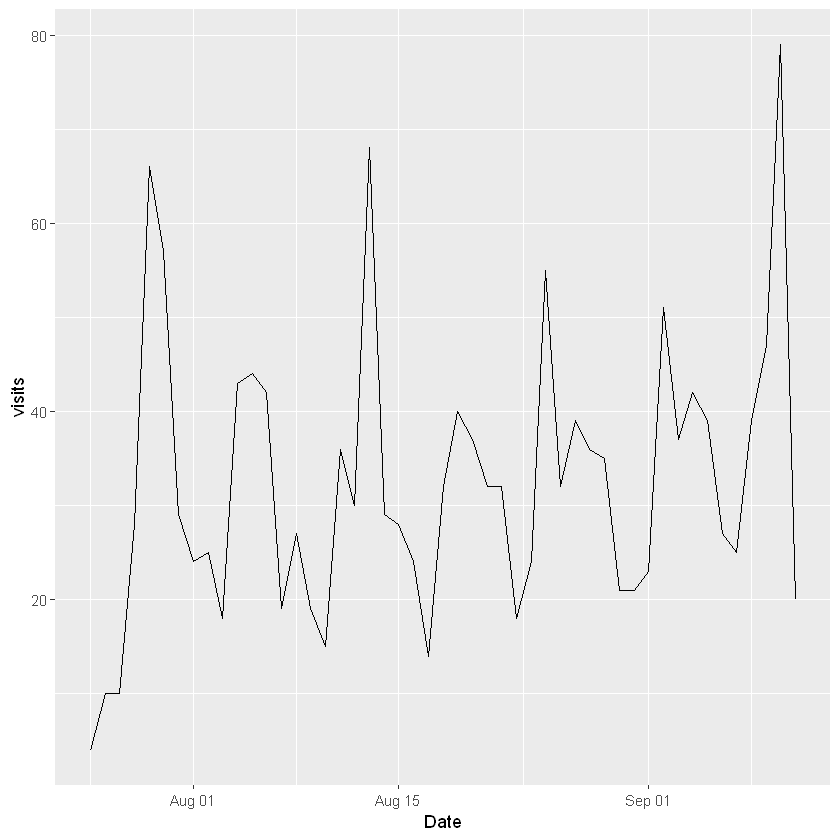

In [19]:
# plot visits by date

df2 %>%
    ggplot(aes(x=Date, y=visits))+
    geom_line()

`geom_smooth()` using formula 'y ~ x'


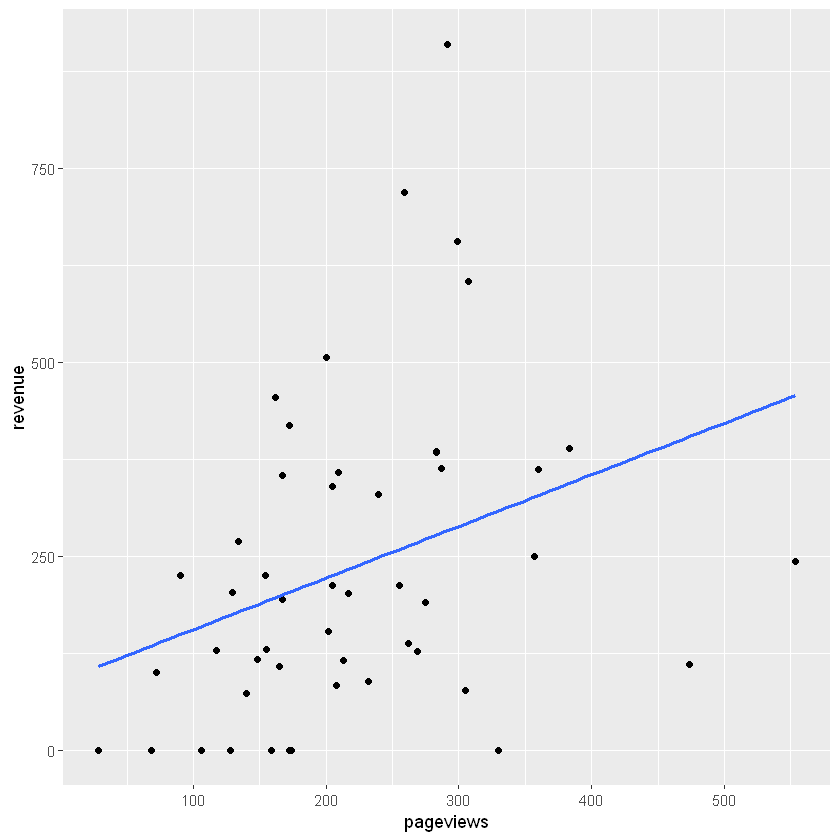

In [20]:
# scatter plot of daily pageviews and revenue

df2 %>%
    ggplot(aes(x=pageviews,y=revenue))+
    geom_point()+
    geom_smooth(method="lm",se=F)